<a href="https://colab.research.google.com/github/Lotfullah21/AI_DL_TensorFlow/blob/main/MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the data 
first , we download the train and validation data set

In [8]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-05-14 18:10:51--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 172.217.1.208, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.2’

rps.zip.2           100%[===================>] 191.38M   214MB/s    in 0.9s    

2022-05-14 18:10:52 (214 MB/s) - ‘rps.zip.2’ saved [200682221/200682221]

--2022-05-14 18:10:52--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.12.240, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test

# Using Zipfile
by using zipfile model,we can unzip the folder and extract to a new folder,as you can see here, we are using **tmp** which create a file temporarily for us and after we done with the program, automatically it will get deleted,so it is a memory efficient work

In [29]:
import zipfile

# Unzip the training data file

file_path = './rps.zip'
zip_ref = zipfile.ZipFile(file_path,'r')
zip_ref.extractall('tmp/training_data')

# Unzip the test data

path = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(path,'r')
zip_ref.extractall('tmp/test_data')


zip_ref.close()

# Lets dive into our directories

In [32]:
import os

# our temporarily extracted Training base directory
base_dir = 'tmp/training_data/rps'

# sub_directories
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissor_dir = os.path.join(base_dir,'scissors')

print('total training scissors images:', len(os.listdir(scissor_dir)))
print('total training paper imaages:',len(os.listdir(paper_dir)))
print('total training rock images:',len(os.listdir(rock_dir)))

# our Test data directory

test_dir = 'tmp/test_data/rps-test-set'
rock_t_dir = os.path.join(test_dir,'rock')
paper_t_dir = os.path.join(test_dir,'paper')
print('total training rock images:',len(os.listdir(rock_t_dir)))
print('total training rock images:',len(os.listdir(paper_t_dir)))

# lets explore what is there in each sub_directories

rock_files = os.listdir(rock_dir)
print(rock_files[0:20])

rock_test_files = os.listdir(rock_t_dir)
print(rock_test_files[0:10])

rock_files = os.listdir(rock_dir)
print(rock_files[0:20])

total training scissors images: 840
total training paper imaages: 840
total training rock images: 840
total training rock images: 124
total training rock images: 124
['rock06ck02-024.png', 'rock04-009.png', 'rock01-056.png', 'rock04-072.png', 'rock05ck01-016.png', 'rock01-019.png', 'rock07-k03-052.png', 'rock03-084.png', 'rock05ck01-048.png', 'rock04-004.png', 'rock03-022.png', 'rock02-091.png', 'rock04-027.png', 'rock02-062.png', 'rock07-k03-037.png', 'rock04-075.png', 'rock07-k03-113.png', 'rock07-k03-050.png', 'rock05ck01-003.png', 'rock03-073.png']
['testrock02-11.png', 'testrock03-27.png', 'testrock04-21.png', 'testrock03-23.png', 'testrock04-05.png', 'testrock04-22.png', 'testrock03-10.png', 'testrock01-29.png', 'testrock01-05.png', 'testrock03-02.png']
['rock06ck02-024.png', 'rock04-009.png', 'rock01-056.png', 'rock04-072.png', 'rock05ck01-016.png', 'rock01-019.png', 'rock07-k03-052.png', 'rock03-084.png', 'rock05ck01-048.png', 'rock04-004.png', 'rock03-022.png', 'rock02-091.png

# Lets Inspect the images of rps

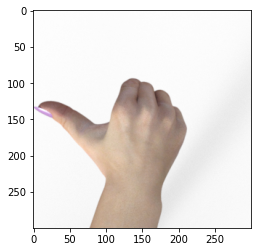

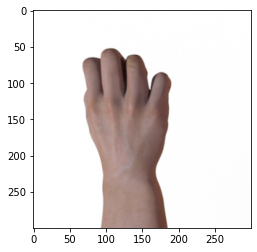

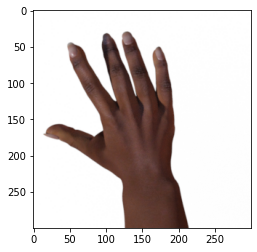

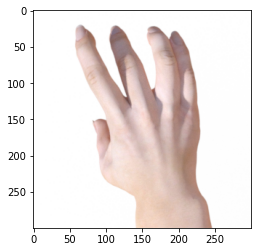

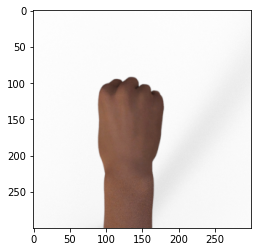

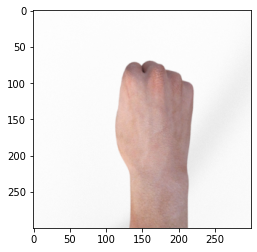

In [34]:
# %matplotlib inline makes your plot outputs appear and be stored within the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


rocks = [os.path.join(rock_dir,file_name)
                      for file_name in rock_files[0:2]]
papers = [os.path.join(paper_dir,file_names)
                      for file_names in paper_files[0:2]]
rock_test = [os.path.join(rock_t_dir,files)
                      for files in rock_test_files[0:2]]                      
for i,image_path in enumerate(rocks+papers+rock_test):
  image = mpimg.imread(image_path)
  plt.imshow(image)
  # plt.axis('On')
  plt.show()


# Building the model 

### number of neurons in last layer:
Here we need to consider few different parameters,like **number of neurons in in last layer** number of neurons here should be choosen based on number of category or classes to be classified,for example in fmnist dataset which we classified hand written digits shoul be 10,
### activation function: 
we have different activation function which have their own usage based on the data and the number of classes which is there in our data, for example **sigmoid** is being used when we deal with two class like cat or monkey, **softmax** is one of the best when we are dealing with multiple classes, like our dataset which is having **3** classes.it distribute probabilities based on each class, the one with the highes probability value will be selected as our label or category among the other categories. 
### loss function:
 here we are having multiple classes so we will use categorical_crossentropy loss.


In [35]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Augmentation
Augment the training data by reshaping,rescaling,rotation and so on.

In [38]:
from keras_preprocessing.image import ImageDataGenerator
# Training Data
Augmented_T_data = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
training_data = Augmented_T_data.flow_from_directory(base_dir,
                                                   target_size =(150,150),
                                                   class_mode = 'categorical',
                                                  batch_size = 120)
# Test Data
Test_Data = ImageDataGenerator(rescale=1/255)
Test_data = Test_Data.flow_from_directory(test_dir,
                                          target_size = (150,150),
                                          class_mode = 'categorical',
                                          batch_size = 120)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# Train and Evaluate the model

In [39]:
history = model.fit(training_data, epochs=20, validation_data = Test_data)

Epoch 1/20
21/21 [==============================] - 33s 959ms/step - loss: 1.1745 - accuracy: 0.3317 - val_loss: 1.1015 - val_accuracy: 0.3333
Epoch 2/20
21/21 [==============================] - 20s 951ms/step - loss: 1.1823 - accuracy: 0.3655 - val_loss: 1.0822 - val_accuracy: 0.3763
Epoch 3/20
21/21 [==============================] - 20s 949ms/step - loss: 1.0671 - accuracy: 0.4532 - val_loss: 1.0613 - val_accuracy: 0.5403
Epoch 4/20
21/21 [==============================] - 21s 975ms/step - loss: 1.0049 - accuracy: 0.5385 - val_loss: 0.4257 - val_accuracy: 0.9328
Epoch 5/20
21/21 [==============================] - 22s 1s/step - loss: 0.8694 - accuracy: 0.6556 - val_loss: 0.8966 - val_accuracy: 0.5726
Epoch 6/20
21/21 [==============================] - 20s 952ms/step - loss: 0.7176 - accuracy: 0.6869 - val_loss: 0.8328 - val_accuracy: 0.5995
Epoch 7/20
21/21 [==============================] - 20s 941ms/step - loss: 0.6189 - accuracy: 0.7389 - val_loss: 0.8913 - val_accuracy: 0.4597
Ep

# Plotting the losses and accurcies versus number of epochs

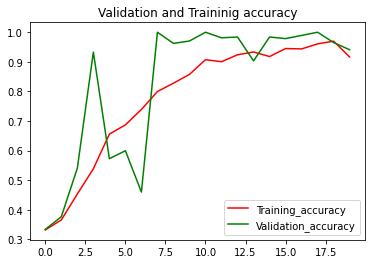

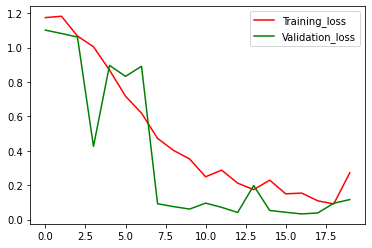

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'r',label = 'Training_accuracy')
plt.plot(epochs,val_accuracy,'g',label = 'Validation_accuracy')
plt.title('Validation and Traininig accuracy')
plt.legend()
plt.figure()

# Plotting the loss for both training and validation data
plt.plot(epochs,loss,'r',label = 'Training_loss')
plt.plot(epochs,val_loss,'g',label = 'Validation_loss')
plt.legend(loc=0)
plt.figure()

plt.show()


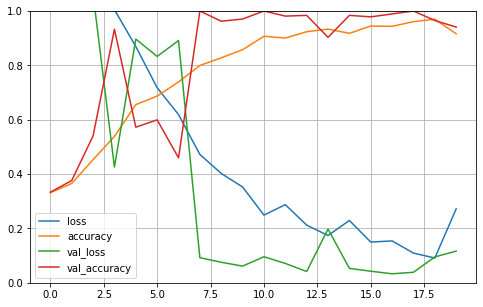

In [41]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


# Model Prediction

In [42]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving kids (2).jpg to kids (2).jpg
kids (2).jpg
[[1. 0. 0.]]
